# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [48]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Read in the data set
df = pd.read_excel("boston.xlsx")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
# Clean and pre-process the data if neccessary

# Check if there are any missing values 
na_counts = df.isna().sum()
print(na_counts)

# There are none - makes life easier, we can continue with preprocessing 

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [18]:
# Confirming data types 
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [19]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std    

<Figure size 1200x1000 with 0 Axes>

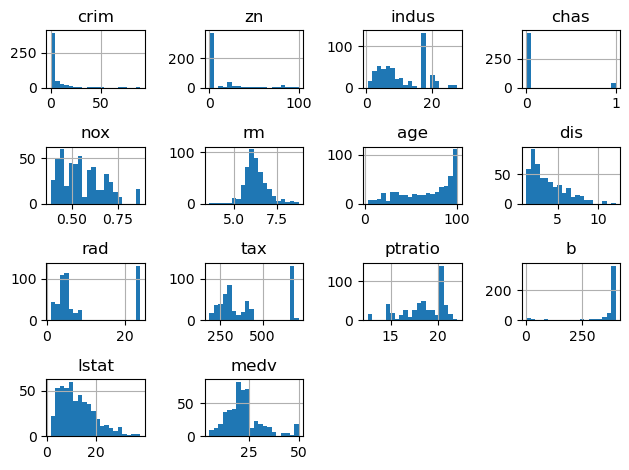

In [20]:
# Explore the data with visualisations such as histograms and correlation matrices

# Plot histograms for each numerical variable
plt.figure(figsize=(12, 10))
df.hist(bins=20)
plt.tight_layout()
plt.show()

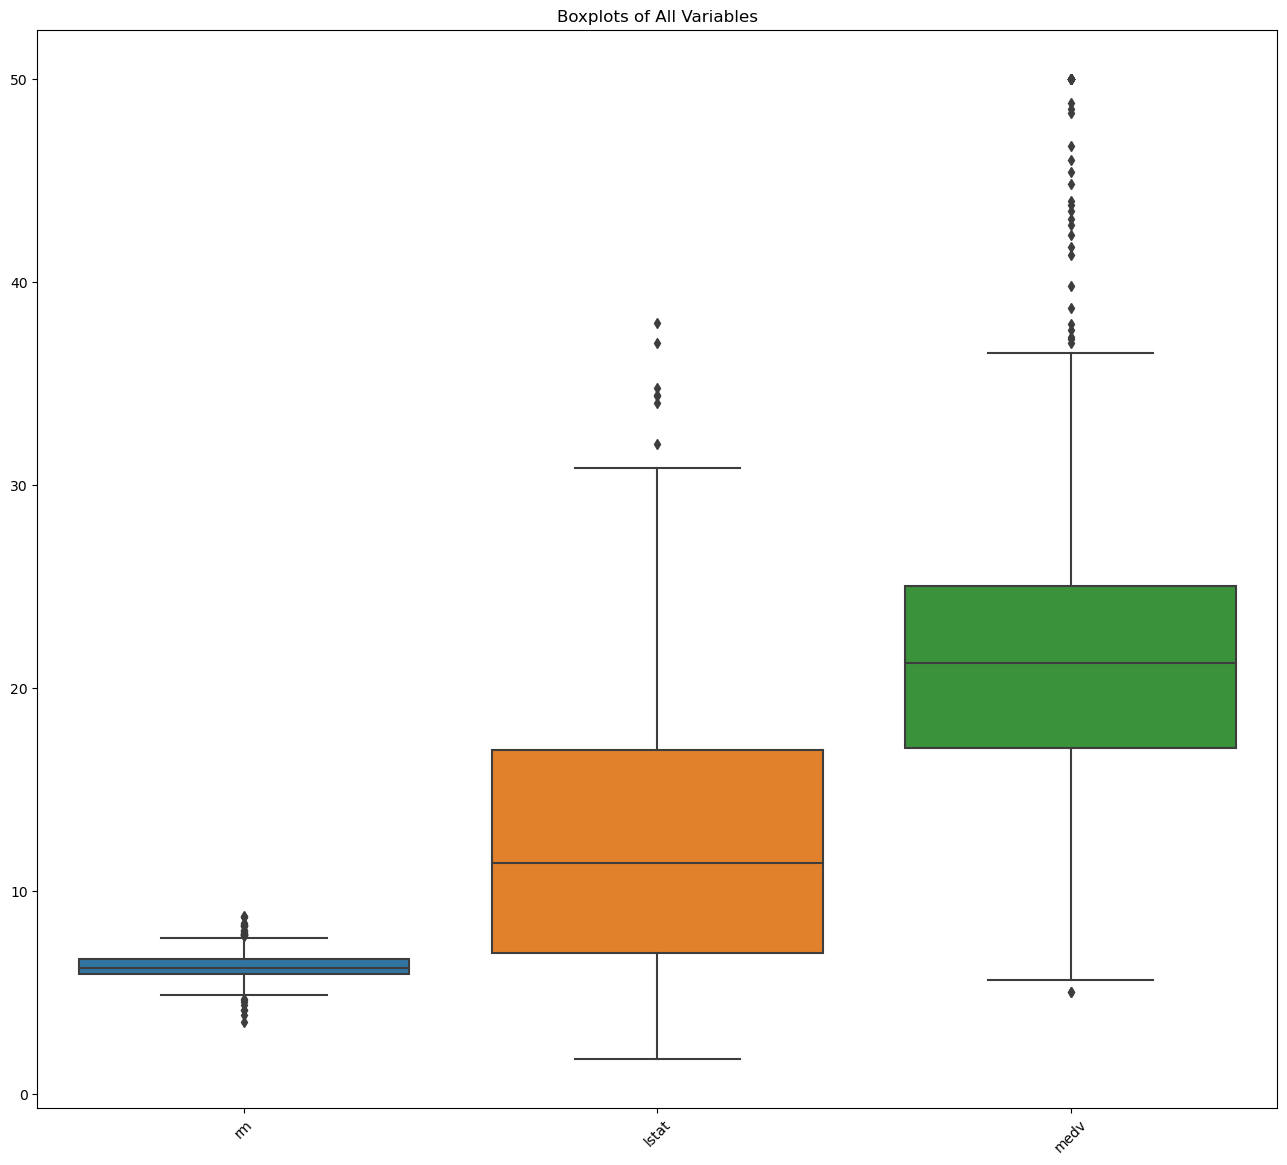

In [45]:
plt.figure(figsize=(16, 14))
sns.boxplot(data=df[['rm', 'lstat', 'medv']])
plt.title("Boxplots of All Variables")
plt.xticks(rotation=45)
plt.show()

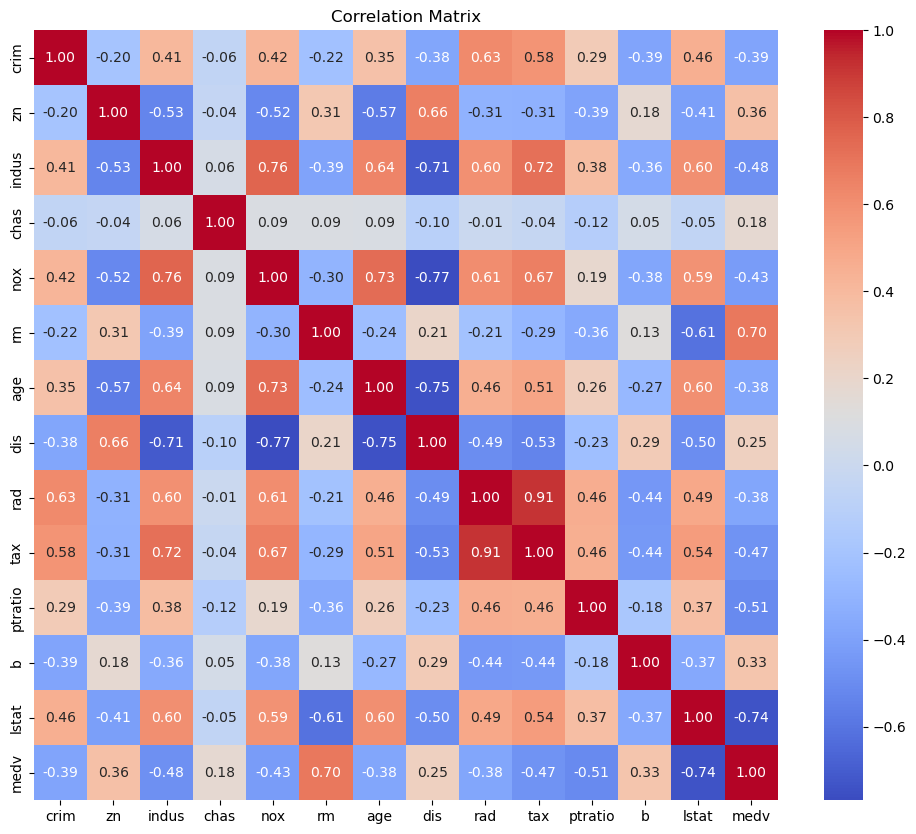

In [21]:
# Compute and visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

/Users/thandekamazubane/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x1000 with 0 Axes>

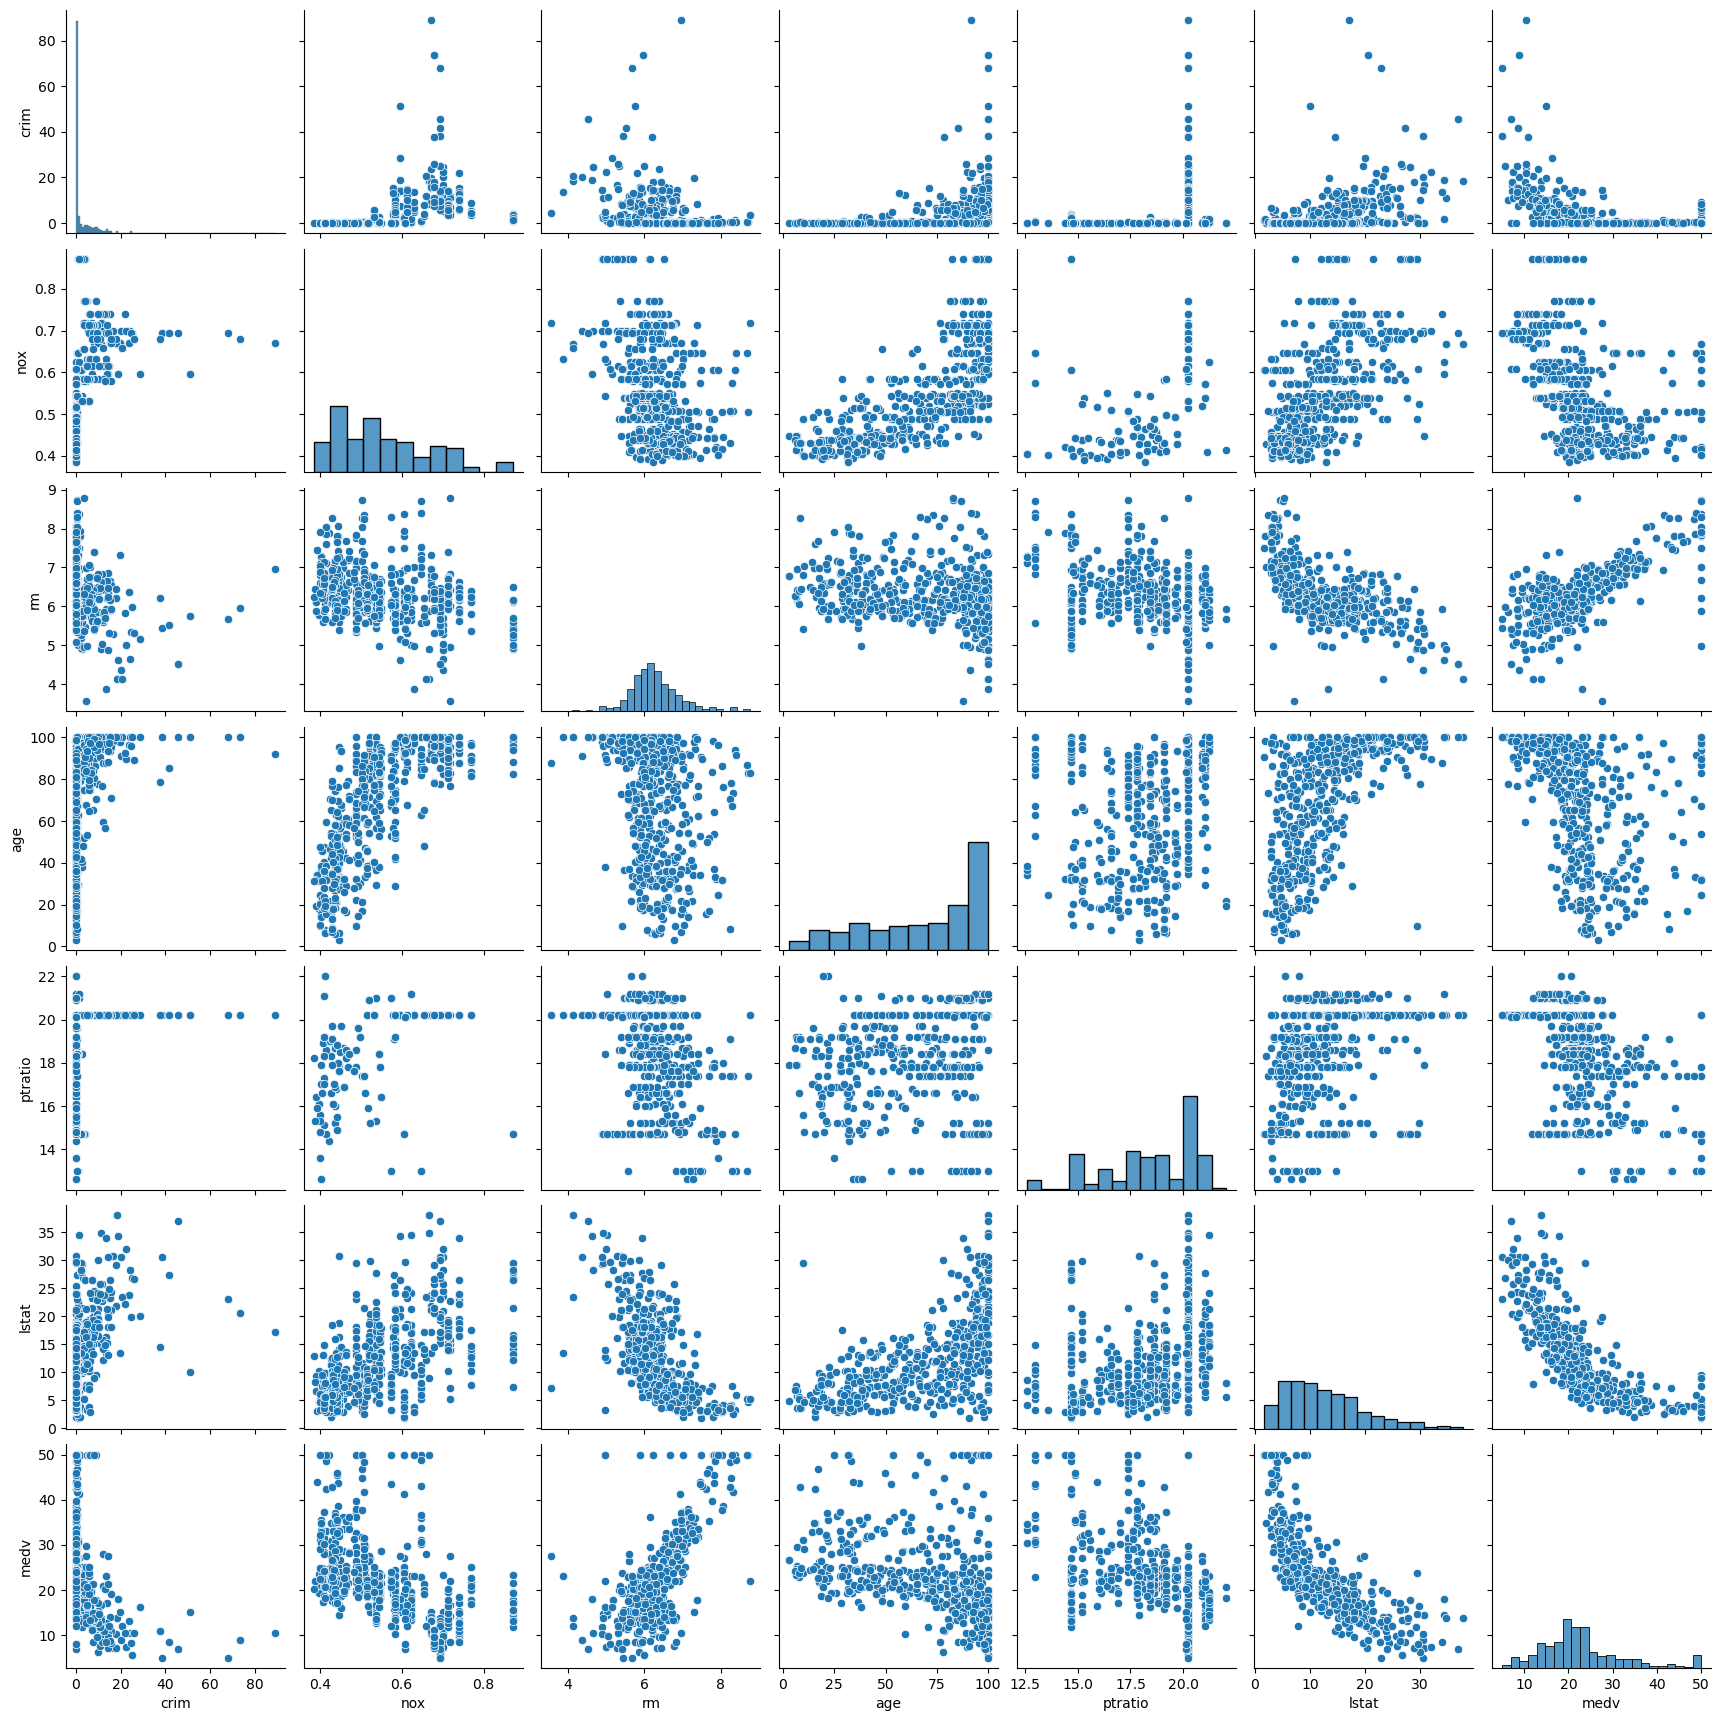

In [23]:
# Scatterplots 
plt.figure(figsize=(12, 10))
sns.pairplot(df[['crim', 'nox', 'rm', 'age', 'ptratio', 'lstat', 'medv']])
plt.show()

In [26]:
# Split the independent variables from the dependent variable

# Selecting the independent variables
X = df[['rm', 'lstat']]

# Dependent variable
y = df['medv']

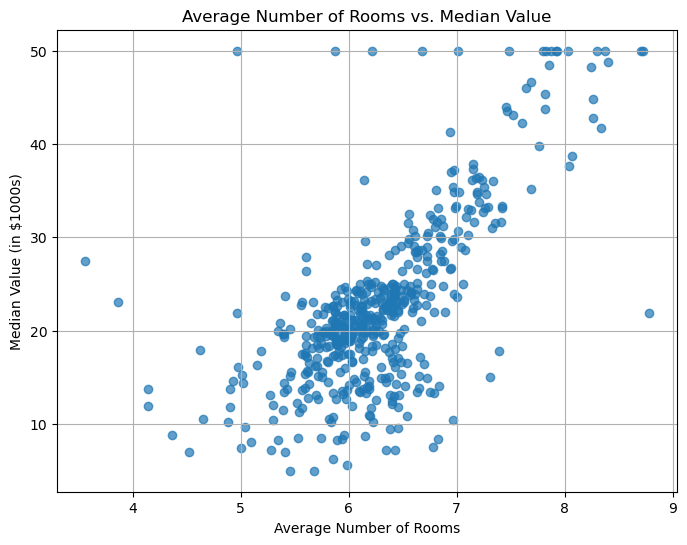

In [28]:
# Explore relationships between the independent and dependent variables

# Plot scatterplot for 'rm' against 'medv'
plt.figure(figsize=(8, 6))
plt.scatter(df['rm'], df['medv'], alpha=0.7)
plt.title('Average Number of Rooms vs. Median Value')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value (in $1000s)')
plt.grid(True)
plt.show()


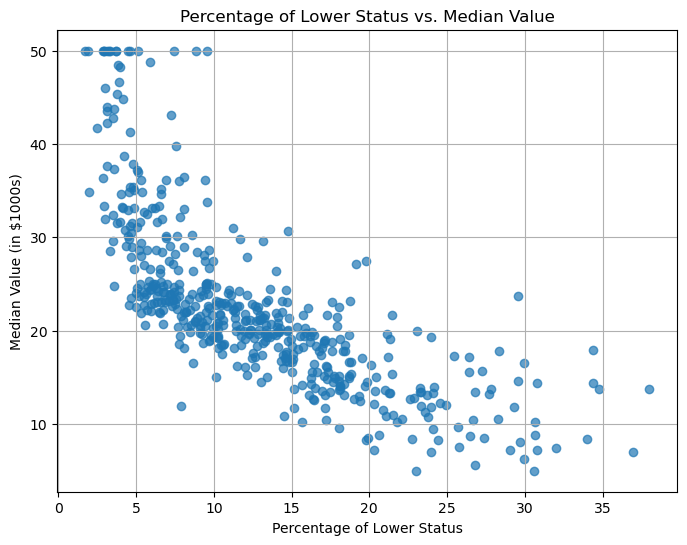

In [29]:
# Plot scatterplot for 'lstat' against 'medv'
plt.figure(figsize=(8, 6))
plt.scatter(df['lstat'], df['medv'], alpha=0.7)
plt.title('Percentage of Lower Status vs. Median Value')
plt.xlabel('Percentage of Lower Status')
plt.ylabel('Median Value (in $1000s)')
plt.grid(True)
plt.show()

In [49]:
# Create a training and test set with a 75:25 split ratio

# Split the data into training and test sets with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X[['rm', 'lstat']], y, test_size=0.25, random_state=42)

In [51]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize the linear regression model
model_scaled = LinearRegression()

# Fit the model to the training data
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [68]:
# Print the model intercept and coefficients

# Print the intercept 
print("Intercept:", model_scaled.intercept_)

# Model coefficients for 'rm' and 'lstat'
print("Coefficient for 'rm':", model_scaled.coef_[0])
print("Coefficient for 'lstat':", model_scaled.coef_[1])


Intercept: 22.907915567282323
Coefficient for 'rm': 3.79214795757379
Coefficient for 'lstat': -4.630140789247737


In [69]:
# Generate predictions for the test set
test_predictions_scaled = model_scaled.predict(X_test_scaled)

# Display the first 5 predictions for the test set
print("First 5 Predictions for the Test Set:")
print(test_predictions_scaled[:5])

First 5 Predictions for the Test Set:
[25.64861998 31.02604952 17.50812413 26.08093021 19.6828203 ]


In [60]:
# Compute the root mean squared error (RMSE) on the test set
test_rmse_scaled = mean_squared_error(y_test, test_predictions_scaled, squared=False)

print("Root Mean Squared Error (RMSE) on Test Set:", test_rmse_scaled)

Root Mean Squared Error (RMSE) on Test Set: 5.435592393969394


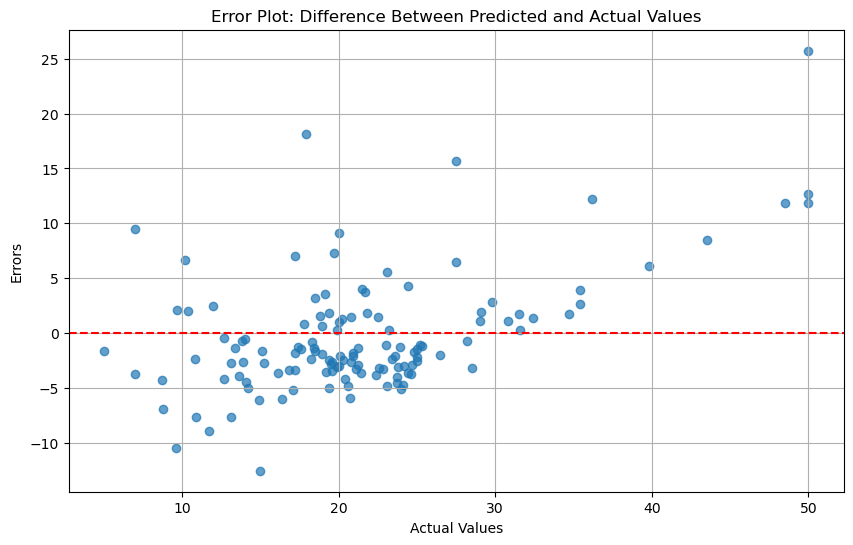

In [61]:
# # Calculate the errors (residuals) between predicted and actual values
errors = y_test - test_predictions_scaled

# Plot the error plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Error Plot: Difference Between Predicted and Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Errors')
plt.grid(True)
plt.show()

In [66]:
# Model coefficients for 'rm' and 'lstat'
print("Coefficient for 'rm':", model_scaled.coef_[0])
print("Coefficient for 'lstat':", model_scaled.coef_[1])

Coefficient for 'rm': 3.79214795757379
Coefficient for 'lstat': -4.630140789247737


**Interpret coefficients in the context of the prediction:**
* rm coefficient: for every unit increase in the average number of rooms, the predicted median value of the homes is expected to increase by 3.792 units ($3,792), holding other variables constant
* lstat coefficient: for every unit increase in the percentage of lower status , the predicted value of the homes is expected to decrease by about 4.63 units ($4630), holding other varibles constant. 

**Summarise findings**

**Data Cleaning & Exploration**:
* All of the variables were numerical, without any missing values, this minimized the need for extensive data cleaning. 
* From the varibles we were interested in, from the historgrams we can see that rm was normally distributed, lstat and medv are both skewed to the right. However, when we look at the box and whiskers we see that medv has a symmetrical distribution with many outliers on the upper right. Similarily with lstat, however with far fewer outliers. Nonetheless, it is important to transorm lstat and medv to ensure that they follow a normal distibution in order for us to perform a linear regression. 
* The correlation matrix - the variables with the strongest correlation with medv are rm (0.70) and lstat (-0.74), suggesting that these might be the best variables to use in a model that predicts medv. 
* Scatterplots - The scatterplots again show that rm has a positive relationship with medv, the higher the number of rooms, the higher the median value. And lstat had a negative relationship, suggesting that the lower the percentage of low status the lower the median house value. 

**Model Performance**
* A multiple linear regression model was built using 'rm' and 'lstat' as independent variables to predict 'medv'.
* The model achieved reasonable performance, as indicated by the root mean squared error (RMSE) on the test set (approximately 5.4356), meaning that on average the model's predictions deviate from the true values by around $5,400. Since there is large variability in this dataset due to the outliers, a RSME of 5.4 might be acceptable, as it reflects a relatively small percentage of the overall range of the median home value. 
* Error plot - The red dashed line shows where the predicted and true values are equal. The points above the line represent overpredictions, and those under the line represent underpredictions. As we can see there are some points which are largly overestimated, however, in geneal the model performs faily well. 
* Overall the model achieved reasonable performance, however, it might be worth running several other models with other independant variables combinations to see if any additions or removal of variables improve the RSME and error plot. 


